Import libraries

In [16]:
import os
import sys
from getpass import getpass
import git
import torch.optim as optim

Configure Environment

In [17]:
os.environ["ENVIRONMENT"] = "windows"
os.environ["REPO_DIR"] = git.Repo(search_parent_directories=True).git.rev_parse("--show-toplevel")
os.environ["ROOT_DIR"] = os.path.abspath(os.path.join(os.getenv("REPO_DIR"), os.pardir))
os.environ["MODEL_ID"] = "32mw3j7y"
os.environ["MODEL_DIR"] = f"{os.getenv('REPO_DIR')}/models/model_{os.getenv('MODEL_ID')}"

Import Repository Resources

In [18]:
sys.path.insert(0, f"{os.getenv('REPO_DIR')}/src")
from helpers import *

sys.path.insert(0, f"{os.getenv('MODEL_DIR')}/src")
from methods import *
from architecture import *
from dataset import *

Download Datasets

In [19]:
dbx_access_token = getpass("Enter your DropBox access token: ")

In [20]:
# Set to True if datasets need to be downloaded to your local machine
download_datasets = False

if download_datasets:
    download_datasets_from_dropbox(
        dbx_access_token = dbx_access_token,
        include_all_datasets = True,
        use_thread = True
    )

Code

In [21]:
num_epochs = 100
batch_size = 10
val_batch_size = 10
val_ratio = 0.2                         # Percent of training set used for validation
lookback = {"count": 0, "stride": 1}    # Prior frames model has access to

In [22]:
device = set_device()
model = initialize_model(
    device = device,
    dbx_access_token = dbx_access_token,
    lookback = lookback,
    reset_weights = False
)

train_dataset, val_dataset = create_datasets(
    device = device,
    include_all_datasets = False,
    include_real_world_datasets = True,
    val_ratio = val_ratio,
    lookback = lookback
)

train_dataloader, val_dataloader = create_dataloaders(
    train_dataset = train_dataset,
    val_dataset = val_dataset,
    batch_size = batch_size,
    val_batch_size = val_batch_size
)

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = nn.CrossEntropyLoss()

Using GPU!
Downloaded model weights from Dropbox.


In [23]:
model, train_loss_hist, val_performance_hist, best_val_performance = training_loop(
    model = model,
    criterion = criterion,
    optimizer = optimizer,
    train_dataloader = train_dataloader,
    val_dataloader = val_dataloader,
    dbx_access_token = dbx_access_token,
    num_epochs = num_epochs,
    critiqueing_metric = "Accuracy",
    auto_stop = False
)

Training:   0%|          | 0/100 [00:00<?, ?epoch/s]

[EPOCH 1/100]  Train Loss: 0.2790  <>  Val Accuracy: 25.46%  <>  Val Mean IoU: 11.31%
[EPOCH 5/100]  Train Loss: 0.2891  <>  Val Accuracy: 24.88%  <>  Val Mean IoU: 11.09%
[EPOCH 10/100]  Train Loss: 0.1686  <>  Val Accuracy: 24.92%  <>  Val Mean IoU: 11.11%
[EPOCH 11/100]  No improvement in validation Accuracy for 10 epochs
[EPOCH 15/100]  Train Loss: 0.2031  <>  Val Accuracy: 24.87%  <>  Val Mean IoU: 11.06%
[EPOCH 20/100]  Train Loss: 0.3875  <>  Val Accuracy: 24.86%  <>  Val Mean IoU: 11.06%
[EPOCH 21/100]  No improvement in validation Accuracy for 20 epochs
[EPOCH 25/100]  Train Loss: 0.2032  <>  Val Accuracy: 25.58%  <>  Val Mean IoU: 11.35%
[EPOCH 30/100]  Train Loss: 0.3613  <>  Val Accuracy: 25.42%  <>  Val Mean IoU: 11.29%
[EPOCH 35/100]  Train Loss: 0.1438  <>  Val Accuracy: 26.52%  <>  Val Mean IoU: 11.73%
[EPOCH 40/100]  Train Loss: 0.4534  <>  Val Accuracy: 24.90%  <>  Val Mean IoU: 11.07%
[EPOCH 45/100]  Train Loss: 0.3135  <>  Val Accuracy: 28.67%  <>  Val Mean IoU: 12.

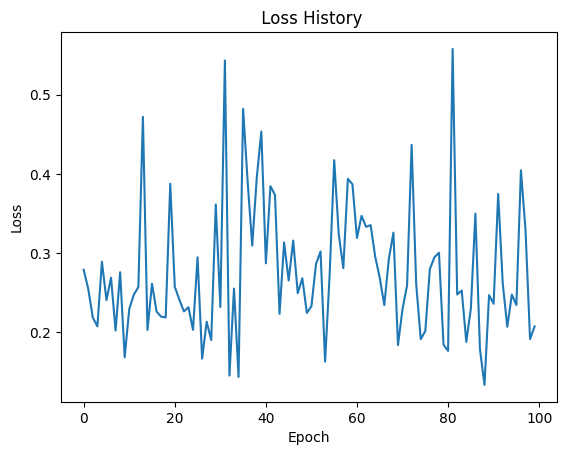

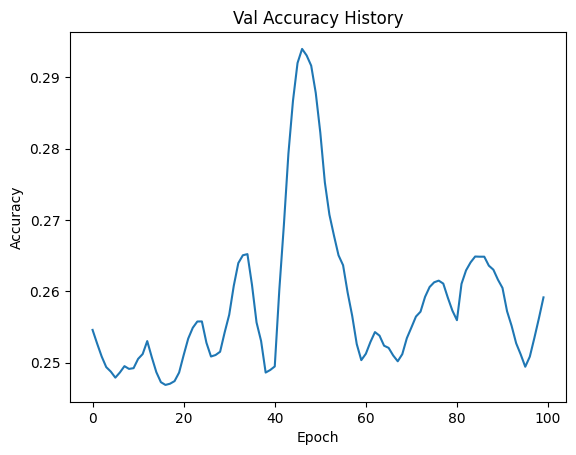

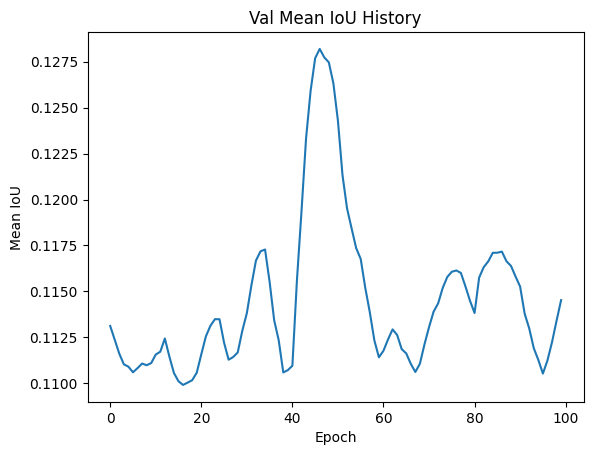

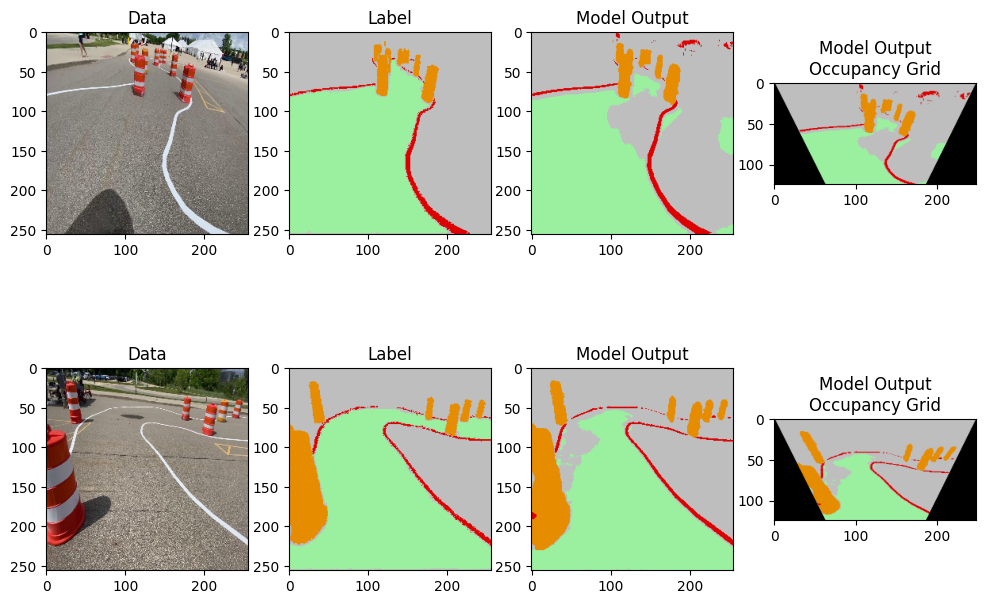

In [24]:
graph_loss_history(train_loss_hist)

graph_performance_history(
    performance_hist = val_performance_hist,
    split = "Val",
    metrics = ["Accuracy", "Mean IoU"]
)

show_sample_results(
    model = model,
    dataset = val_dataset,
    device = device,
    num_samples = 2
)

Testing on UNFINISHED_comp23_4_mini_benchmark:   0%|          | 0/30 [00:00<?, ? frame/s]


UNFINISHED_comp23_4_mini_benchmark metrics:
	Accuracy: 0.2414
	Background Precision: 0.1989
	Background Recall: 0.3274
	Background Specificity: 0.6890
	Background F1 Score: 0.2475
	Background IoU: 0.1412
	Background Dice Coefficient: 0.2475
	Lane Lines Precision: 0.0139
	Lane Lines Recall: 0.1267
	Lane Lines Specificity: 0.8135
	Lane Lines F1 Score: 0.0250
	Lane Lines IoU: 0.0127
	Lane Lines Dice Coefficient: 0.0250
	Drivable Area Precision: 0.6669
	Drivable Area Recall: 0.2025
	Drivable Area Specificity: 0.8029
	Drivable Area F1 Score: 0.3107
	Drivable Area IoU: 0.1839
	Drivable Area Dice Coefficient: 0.3107
	Cones Precision: 0.1419
	Cones Recall: 0.3326
	Cones Specificity: 0.7049
	Cones F1 Score: 0.1989
	Cones IoU: 0.1105
	Cones Dice Coefficient: 0.1989
	Mean IoU: 0.1121
	Mean Dice Coefficient: 0.1955

Metrics saved in performance.json for benchmark "UNFINISHED_comp23_4_mini_benchmark".


Testing on UNFINISHED_comp23_4_mini_benchmark_duplicate:   0%|          | 0/30 [00:00<?, ? frame/s]


UNFINISHED_comp23_4_mini_benchmark_duplicate metrics:
	Accuracy: 0.2414
	Background Precision: 0.1989
	Background Recall: 0.3274
	Background Specificity: 0.6890
	Background F1 Score: 0.2475
	Background IoU: 0.1412
	Background Dice Coefficient: 0.2475
	Lane Lines Precision: 0.0139
	Lane Lines Recall: 0.1267
	Lane Lines Specificity: 0.8135
	Lane Lines F1 Score: 0.0250
	Lane Lines IoU: 0.0127
	Lane Lines Dice Coefficient: 0.0250
	Drivable Area Precision: 0.6669
	Drivable Area Recall: 0.2025
	Drivable Area Specificity: 0.8029
	Drivable Area F1 Score: 0.3107
	Drivable Area IoU: 0.1839
	Drivable Area Dice Coefficient: 0.3107
	Cones Precision: 0.1419
	Cones Recall: 0.3326
	Cones Specificity: 0.7049
	Cones F1 Score: 0.1989
	Cones IoU: 0.1105
	Cones Dice Coefficient: 0.1989
	Mean IoU: 0.1121
	Mean Dice Coefficient: 0.1955

Metrics saved in performance.json for benchmark "UNFINISHED_comp23_4_mini_benchmark_duplicate".


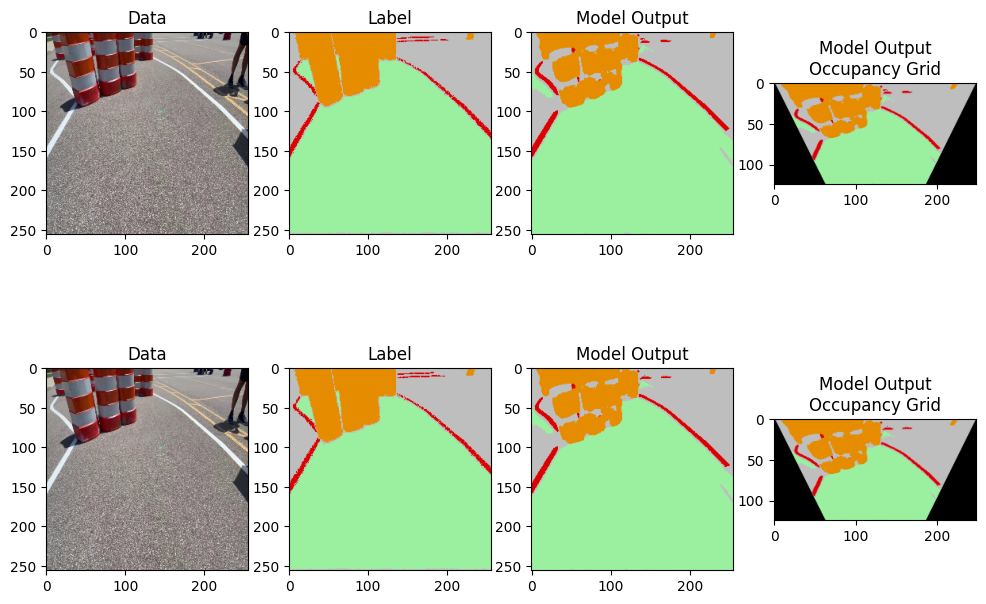

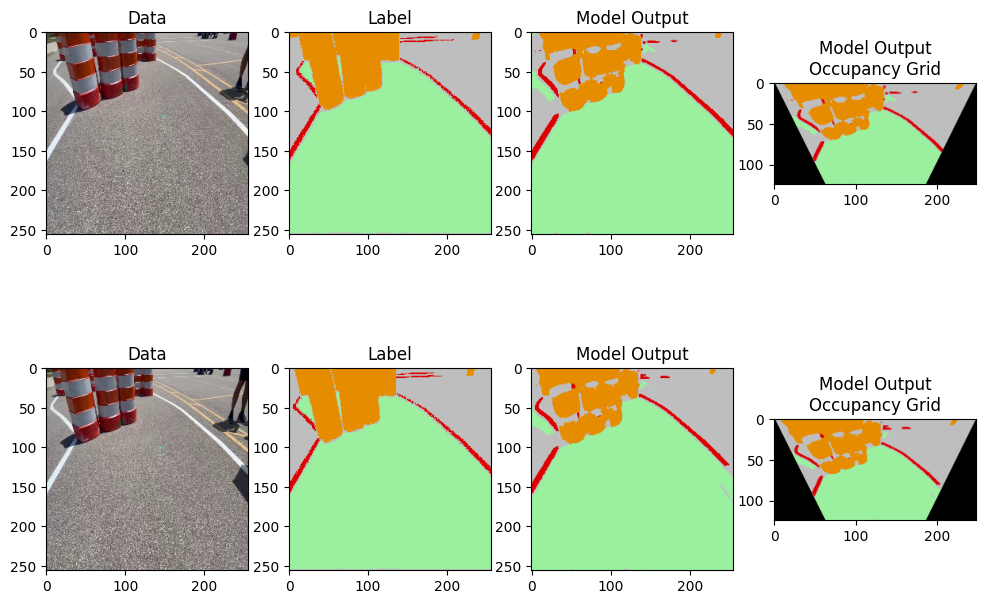

In [25]:
test_model_on_benchmarks(
    model = model,
    device = device,
    all_benchmarks = True,
    num_sample_results = 2,
    lookback = lookback
)